# DETECTING EARLY ALZHEIMER'S USING MRI DATA AND MACHINE LEARNING
----
## TABLE OF CONTENT
1. Problem Statement
2. Data
  1. Dataset Description
  2. Column Descriptors
3. Related Work
4. Exploratory Data Analysis
5. Data Precrocessing
  1. Removing rows with missing values
  2. Imputation
  3. Splitting Train/Validation/Test Sets
  4. Cross-validation
6. Model
  1. Performance Measure
  2. Logistic Regression
  3. Support Vector Machine
  4. Decision Tree
  5. Random Forest Classifier
  6. AdaBoost
7. Conclusion
  1. Results
  2. Unique Approach
  3. Implementation
  4. Limitation
  5. Further Research
8. Acknowledgements

## TEAM MEMBERS
1. Hyunseok Choi
2. Kyuri Song
3. Saurin Parikh


# 1. PROBLEM STATEMENT
---
## ALZHEIMER'S DISEASE

* [Alzheimer's disease (AD)](https://en.wikipedia.org/wiki/Alzheimer%27s_disease) is a neurodegenerative disorder of uncertain cause and pathogenesis that primarily affects older adults and is the most common cause of dementia.
* The earliest clinical manifestation of AD is selective memory impairment and while treatments are available to ameliorate some symptoms, there is no cure currently available.
* Brain Imaging via magnetic resonance imaging (MRI), is used for evaluation of patients with suspected AD.
* MRI findings include both, local and generalized shrinkage of brain tissue. Below is a pictorial representation of tissue shrinkage: ![braintissue](https://upload.wikimedia.org/wikipedia/commons/a/a5/Alzheimer%27s_disease_brain_comparison.jpg)
* Some studies have suggested that MRI features may predict rate of decline of AD and may guide therapy in the future.
* However in order to reach that stage clinicians and researchers will have to make use of machine learning techniques that can accurately predict progress of a patient from mild cognitive impairment to dementia.
* We propose to develop a sound model that can help clinicians do that and predict early alzheimer's.

# 2. DATA
---
The team has found MRI related data that was generated by the Open Access Series of Imaging Studies (OASIS) project that is available both, on their [website](www.oasis-brains.org) and [kaggle](www.kaggle.com/jboysen/mri-and-alzheimers) that can be utilized for the purpose of training various machine learning models to identify patients with mild to moderate dementia.

## 2.A DATASET DESCRIPTION
* We will be using the [longitudinal MRI data](http://www.oasis-brains.org/pdf/oasis_longitudinal.csv).
* The dataset consists of a longitudinal MRI data of 150 subjects aged 60 to 96.
* Each subject was scanned at least once.
* Everyone is right-handed.
* 72 of the subjects were grouped as 'Nondemented' throughout the study.
* 64 of the subjects were grouped as 'Demented' at the time of their initial visits and remained so throughout the study.
* 14 subjects were grouped as 'Nondemented' at the time of their initial visit and were subsequently characterized as 'Demented' at a later visit. These fall under the 'Converted' category.

## 2.B COLUMN DESCRIPTORS  

|COL  |FULL-FORMS                          |
|-----|------------------------------------|
|EDUC |Years of education                  |
|SES  |Socioeconomic Status                |
|MMSE |[Mini Mental State Examination](http://www.dementiatoday.com/wp-content/uploads/2012/06/MiniMentalStateExamination.pdf)       |
|CDR  |[Clinical Dementia Rating](http://knightadrc.wustl.edu/cdr/PDFs/CDR_Table.pdf)            |
|eTIV |[Estimated Total Intracranial Volume](https://link.springer.com/article/10.1007/s12021-015-9266-5) |
|nWBV |[Normalize Whole Brain Volume](https://www.ncbi.nlm.nih.gov/pubmed/11547042)        |
|ASF  |[Atlas Scaling Factor](http://www.sciencedirect.com/science/article/pii/S1053811904003271)                |


# 3. RELATED WORK
---

The original publication has only done some preliminary exploration of the MRI data as majority of their work was focused towards data gathering. However, in the recent past there have been multiple efforts that have been made to detect early-alzheimers using MRI data. Some of the work that was found in the literature was as follows:

1) **Machine learning framework for early MRI-based Alzheimer's conversion prediction in MCI subjects.** [3]

   In this paper the authors were interested in identifying mild cognitive impairment(MCI) as a transitional stage between age-related coginitive decline and Alzheimer's. The group proposes a novel MRI-based biomaker that they developed using machine learning techniques. They used data available from the Alzheimer's Disease Neuroimaging Initiative [ADNI](http://adni.loni.usc.edu/) Database. The paper claims that their aggregate biomarker achieved a 10-fold cross-validation area under the curve (AUC) score of 0.9020 in discriminating between progressive MCI (pMCI) and stable MCI (sMCI).
   
   Noteworthy Techniques:
   1. Semi-supervised learning on data available from AD patients and normal controls, without using MCI patients, to help with the sMCI/pMCI classification. Performed feature selection using regularized logistic regression.
   2. They removed aging effects from MRI data before classifier training to prevent possible confounding between changes due to AD and those due to normal aging.
   3. Finally constructed an aggregate biomarker by first learning a separate MRI biomarker and then combining age and cognitive measures about MCI subjects by applying a random foresst classifier.


2) **Detection of subjects and brain regions related to Alzheimer's disease using 3D MRI scans based on eigenbrain and machine learning.** [4] 
    
    The authors of this paper have proposed a novel computer-aided diagnosis (CAD) system for MRI images of brains based on eigenbrains [(eg.)](https://www.frontiersin.org/files/Articles/138015/fncom-09-00066-HTML/image_m/fncom-09-00066-t010.jpg) and machine learning. In their approach they use key slices from the 3D volumetric data generated from the MRI and then generate eigenbrain images based on [EEG](https://en.wikipedia.org/wiki/Electroencephalography) data. They then used kernel support-vector-machines with different kernels that were trained by particle swarm optimization. The accuracy of their polynomial kernel (92.36 $\pm$ 0.94) was better than their linear (91.47 $\pm$ 1.02) anf radial basis function (86.71 $\pm$ 1.93) kernels.


3) **Support vector machine-based classification of Alzheimer’s disease from whole-brain anatomical MRI.** [5]

    In this paper the authors propose a new method to discriminate patients with AD from elderly controls based on support vector machine (SVM) classification of whole-brain anatomical MRI. The authors used three-dimensional T1-weighted MRI images from 16 patients with AD and 22 elderly controls and parcellated them into regions of interests (ROIs). They then used a SVM algorithm to classify subjects based upon the gray matter characteristics of these ROIs. Based on their results the classifier obtained 94.5% mean correctness.
    
    The possible downfalls of their technique might be the fact that they haven't taken age related changes in the gray matter into account and they were working with a small data set.
    
    
We have described 3 papers over here that we found the most interesting, however there are a few more that have explored the same question. Regardless, it is worthwhile to mention that the above papers were exploring raw MRI data and we, on the other hand, are dealing with 3 to 4 biomarkers that are generated from MRI images.

# 4. EXPLORATORY DATA ANALYSIS (EDA)
---

In this section, we have focused on exploring the relationship between each feature of MRI tests and dementia of the patient. The reason we conducted this Exploratory Data Analysis process is to state the relationship of data explicitly through a graph so that we could assume the correlations before data extraction or data analysis. It might help us to understand the nature of the data and to select the appropriate analysis method for the model later.

The minimum, maximum, and average values of each feature for graph implementation are as follows.

||Min|Max|Mean|
|---
|Educ|6|23|14.6|
|SES|1|5|2.34
|MMSE|17|30|27.2|
|CDR|0|1|0.29|
|eTIV|1123|1989|1490|
|nWBV|0.66|0.837|0.73|
|ASF|0.883|1.563|1.2|

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

df = pd.read_csv('oasis_longitudinal.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [2]:
df = df.loc[df['Visit']==1] # use first visit data only because of the analysis we're doing
df = df.reset_index(drop=True) # reset index after filtering first visit data
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # M/F column
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1) # Drop unnecessary columns

In [3]:
# bar drawing function
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

Text(0.5,1,'Gender and Demented rate')

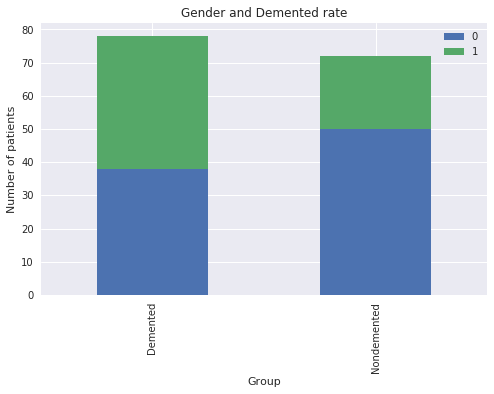

In [4]:
# Gender  and  Group ( Femal=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

The above graph indicates that men are more likely with dementia than women.

(15.3, 30.0)

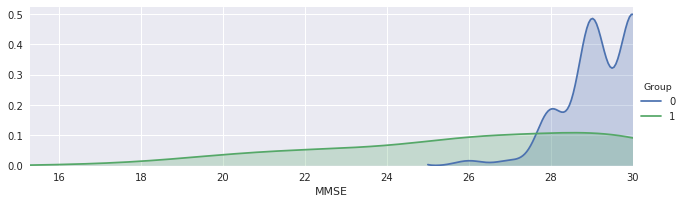

In [5]:
#MMSE : Mini Mental State Examination
# Nondemented = 0, Demented =1
# Nondemented has higher test result ranging from 25 to 30. 
#Min 17 ,MAX 30
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

The chart shows Nondemented group got much more higher MMSE scores than Demented group.

(0.6, 0.9)

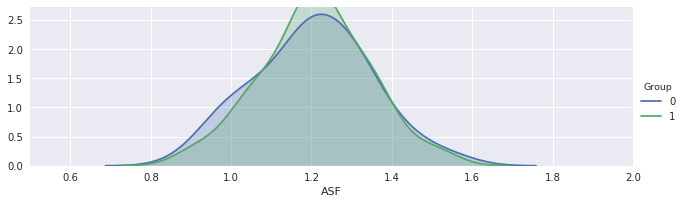

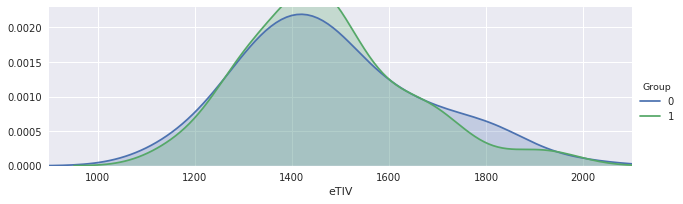

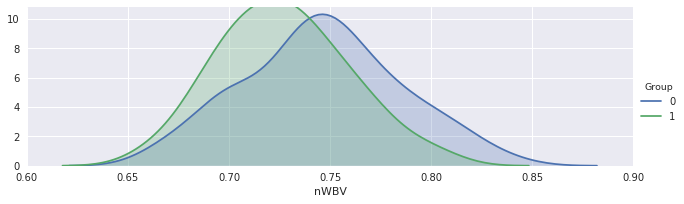

In [6]:
#bar_chart('ASF') = Atlas Scaling Factor
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)

#eTIV = Estimated Total Intracranial Volume
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)

#'nWBV' = Normalized Whole Brain Volume
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)

The chart indicates that Nondemented group has higher brain volume ratio than Demented group. This is assumed to be because the diseases affect the brain to be shrinking its tissue. 

(50, 100)

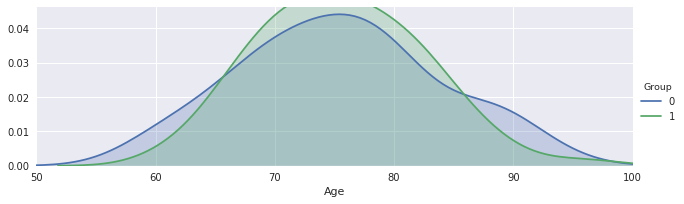

In [7]:
#AGE. Nondemented =0, Demented =0
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

There is a higher concentration of 70-80 years old in the Demented patient group than those in the nondemented patients.
We guess patients who suffered from that kind of disease has lower survival rate so that there are a few of 90 years old.

(0, 0.16)

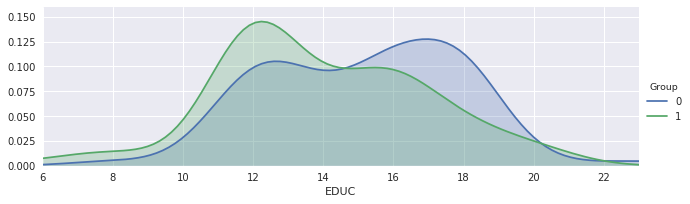

In [8]:
#'EDUC' = Years of Education
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)

## Intermediate Result Summary
1. Men are more likely with demented, an Alzheimer's Disease, than Women.
2. Demented patients were less educated in terms of years of education.
3. Nondemented group has higher brain volume than Demented group.
4. Higher concentration of 70-80 years old in Demented group than those in the nondemented patients.

# 5. Data Preprocessing
---
We identified 8 rows with missing values in SES column. We deal with this issue with 2 approaches. One is just to drop the rows with missing values. The other is to replace the missing values with the corresponing values, also known as 'Imputation'. Since we have only 150 data, I assume imputation would help the performance of our model.

In [9]:
# Check missing values by each column
pd.isnull(df).sum() 
# The column, SES has 8 missing values

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

## 5.A Removing rows with missing values

In [10]:
# Dropped the 8 rows with missing values in the column, SES
df_dropna = df.dropna(axis=0, how='any')
pd.isnull(df_dropna).sum()

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [11]:
df_dropna['Group'].value_counts()

0    72
1    70
Name: Group, dtype: int64

## 5.B Imputation

Scikit-learn provides package for imputation [6], but we do it manually. Since the *SES* is a discrete variable, we use median for the imputation.

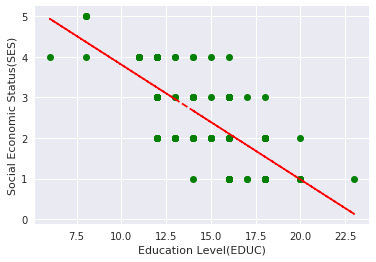

In [12]:
# Draw scatter plot between EDUC and SES
x = df['EDUC']
y = df['SES']

ses_not_null_index = y[~y.isnull()].index
x = x[ses_not_null_index]
y = y[ses_not_null_index]

# Draw trend line in red
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go', x, p(x), "r--")
plt.xlabel('Education Level(EDUC)')
plt.ylabel('Social Economic Status(SES)')

plt.show()

In [13]:
df.groupby(['EDUC'])['SES'].median()

EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64

In [14]:
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)

In [15]:
# I confirm there're no more missing values and all the 150 data were used.
pd.isnull(df['SES']).value_counts()

False    150
Name: SES, dtype: int64

## 5.C Splitting Train/Validation/Test Sets

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score

In [17]:
# Dataset with imputation
Y = df['Group'].values # Target for the model
X = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use

# splitting into three sets
X_trainval, X_test, Y_trainval, Y_test = train_test_split(
    X, Y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Dataset after dropping missing value rows
Y = df_dropna['Group'].values # Target for the model
X = df_dropna[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use

# splitting into three sets
X_trainval_dna, X_test_dna, Y_trainval_dna, Y_test_dna = train_test_split(
    X, Y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval_dna)
X_trainval_scaled_dna = scaler.transform(X_trainval_dna)
X_test_scaled_dna = scaler.transform(X_test_dna)

## 5.D Cross-validation
We conduct 5-fold cross-validation to figure out the best parameters for each model, Logistic Regression, SVM, Decision Tree, Random Forests, and AdaBoost. Since our performance metric is accuracy, we find the best tuning parameters by *accuracy*. In the end, we compare the accuracy, recall and AUC for each model.

# 6. MODEL
---

## 6.A Performance Measures

We use area under the receiver operating characteristic curve (AUC) as our main performance measure. We believe that in case of medical diagnostics for non-life threatening terminal diseases like most neurodegenerative diseases it is important to have a high true positive rate so that all patients with alzheimer's are identified as early as possible. But we also want to make sure that the false positive rate is as low as possible since we do not want to misdiagnose a healthy adult as demented and begin medical therapy. Hence AUC seemed like a ideal choice for a performance measure.

We will also be looking at accuracy and recall for each model.

In the figure below, you can think relevant elements as actually demented subjects.
Precision and Recall [12]
![Precision and Recall](https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg)

## 6.B Logistic Regression
The parameter C, inverse of regularization strength.

Tuning range: [0.001, 0.1, 1, 10, 100]

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

In [20]:
acc = [] # list to store all performance metric

In [21]:
# Dataset with imputation
best_score=0
kfolds=5 # set the number of folds

for c in [0.001, 0.1, 1, 10, 100]:
    logRegModel = LogisticRegression(C=c)
    # perform cross-validation
    scores = cross_val_score(logRegModel, X_trainval, Y_trainval, cv=kfolds, scoring='accuracy') # Get recall for each parameter setting
    
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    
    # Find the best parameters and score
    if score > best_score:
        best_score = score
        best_parameters = c

# rebuild a model on the combined training and validation set
SelectedLogRegModel = LogisticRegression(C=best_parameters).fit(X_trainval_scaled, Y_trainval)

test_score = SelectedLogRegModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedLogRegModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test AUC with the best C parameter is", test_auc)
m = 'Logistic Regression (w/ imputation)'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.754112554113
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.789473684211
Test recall with the best C parameter is 0.75
Test AUC with the best C parameter is 0.791666666667


In [22]:
# Dataset after dropping missing value rows
best_score=0
kfolds=5 # set the number of folds

for c in [0.001, 0.1, 1, 10, 100]:
    logRegModel = LogisticRegression(C=c)
    # perform cross-validation
    scores = cross_val_score(logRegModel, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')
    
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    
    # Find the best parameters and score
    if score > best_score:
        best_score = score
        best_parameters = c

# rebuild a model on the combined training and validation set
SelectedLogRegModel = LogisticRegression(C=best_parameters).fit(X_trainval_scaled_dna, Y_trainval_dna)

test_score = SelectedLogRegModel.score(X_test_scaled_dna, Y_test_dna)
PredictedOutput = SelectedLogRegModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)        
print("Test recall with the best C parameter is", test_recall)
print("Test AUC with the best C parameter is", test_auc)

m = 'Logistic Regression (w/ dropna)'
acc.append([m, test_score, test_recall, test_recall, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.700909090909
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.75
Test recall with the best C parameter is 0.7
Test AUC with the best C parameter is 0.794444444444


In overall, dataset with imputation outperforms the one without imputation. For the later models, we use dataset without imputation.

## 6.C SVM
C: Penalty parameter C of the error term. [0.001, 0.01, 0.1, 1, 10, 100, 1000]

gamma: kernel coefficient. [0.001, 0.01, 0.1, 1, 10, 100, 1000]

kernel: kernel type. ['rbf', 'linear', 'poly', 'sigmoid']

In [23]:
best_score = 0

for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter C
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter gamma
        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']: # iterate over the values we need to try for the kernel parameter
            svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter) #define the model
            # perform cross-validation
            scores = cross_val_score(svmModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')
            # the training set will be split internally into training and cross validation

            # compute mean cross-validation accuracy
            score = np.mean(scores)
            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score #store the score 
                best_parameter_c = c_paramter #store the parameter c
                best_parameter_gamma = gamma_paramter #store the parameter gamma
                best_parameter_k = k_parameter
            

# rebuild a model with best parameters to get score 
SelectedSVMmodel = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k).fit(X_trainval_scaled, Y_trainval)

test_score = SelectedSVMmodel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedSVMmodel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on cross validation set is:", best_score)
print("Best parameter for c is: ", best_parameter_c)
print("Best parameter for gamma is: ", best_parameter_gamma)
print("Best parameter for kernel is: ", best_parameter_k)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is", test_recall)
print("Test recall with the best parameter is", test_auc)

m = 'SVM'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on cross validation set is: 0.77150385846
Best parameter for c is:  100
Best parameter for gamma is:  0.1
Best parameter for kernel is:  rbf
Test accuracy with the best parameters is 0.815789473684
Test recall with the best parameters is 0.7
Test recall with the best parameter is 0.822222222222


## 6.D Decision Tree
Maximum depth. [1, 2, ..., 8]

8 is the number of features

In [24]:
best_score = 0

for md in range(1, 9): # iterate different maximum depth values
    # train the model
    treeModel = DecisionTreeClassifier(random_state=0, max_depth=md, criterion='gini')
    # perform cross-validation
    scores = cross_val_score(treeModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')
    
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameter = md

# Rebuild a model on the combined training and validation set        
SelectedDTModel = DecisionTreeClassifier(max_depth=best_parameter).fit(X_trainval_scaled, Y_trainval )

test_score = SelectedDTModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedDTModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for the maximum depth is: ", best_parameter)
print("Test accuracy with best parameter is ", test_score)
print("Test recall with best parameters is ", test_recall)
print("Test AUC with the best parameter is ", test_auc)

m = 'Decision Tree'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.778543195935
Best parameter for the maximum depth is:  1
Test accuracy with best parameter is  0.815789473684
Test recall with best parameters is  0.65
Test AUC with the best parameter is  0.825


In [25]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedDTModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.0'],
       ['Age', '0.0'],
       ['EDUC', '0.0'],
       ['SES', '0.0'],
       ['MMSE', '1.0'],
       ['eTIV', '0.0'],
       ['nWBV', '0.0'],
       ['ASF', '0.0']], 
      dtype='<U4')

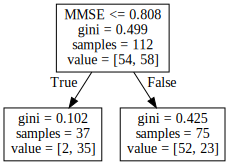

In [26]:
from sklearn.tree import export_graphviz
import graphviz 
dot_data=export_graphviz(SelectedDTModel, feature_names=X_trainval.columns.values.tolist(),out_file=None)
graph = graphviz.Source(dot_data)  
graph 

## 6.E Random Forest Classifier
n_estimators(M): the number of trees in the forest

max_features(d): the number of features to consider when looking for the best split

max_depth(m): the maximum depth of the tree. 

In [27]:
best_score = 0

for M in range(2, 15, 2): # combines M trees
    for d in range(1, 9): # maximum number of features considered at each split
        for m in range(1, 9): # maximum depth of the tree
            # train the model
            # n_jobs(4) is the number of parallel computing
            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, random_state=0)
        
            # perform cross-validation
            scores = cross_val_score(forestModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

            # compute mean cross-validation accuracy
            score = np.mean(scores)

            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score
                best_M = M
                best_d = d
                best_m = m

# Rebuild a model on the combined training and validation set        
SelectedRFModel = RandomForestClassifier(n_estimators=M, max_features=d,
                                          max_depth=m, random_state=0).fit(X_trainval_scaled, Y_trainval )

PredictedOutput = SelectedRFModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameters of M, d, m are: ", best_M, best_d, best_m)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

m = 'Random Forest'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.796329757199
Best parameters of M, d, m are:  14 5 7
Test accuracy with the best parameters is 0.842105263158
Test recall with the best parameters is: 0.8
Test AUC with the best parameters is: 0.844444444444


In [28]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedRFModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.0350313242748'],
       ['Age', '0.0955123712553'],
       ['EDUC', '0.0626155679721'],
       ['SES', '0.0606203275185'],
       ['MMSE', '0.400656596279'],
       ['eTIV', '0.0700549752829'],
       ['nWBV', '0.146057111794'],
       ['ASF', '0.129451725623']], 
      dtype='<U15')

## 6.F AdaBoost

In [29]:
best_score = 0

for M in range(2, 15, 2): # combines M trees
    for lr in [0.0001, 0.001, 0.01, 0.1, 1]:
        # train the model
        boostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0)

        # perform cross-validation
        scores = cross_val_score(boostModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

        # compute mean cross-validation accuracy
        score = np.mean(scores)

        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_M = M
            best_lr = lr

# Rebuild a model on the combined training and validation set        
SelectedBoostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0).fit(X_trainval_scaled, Y_trainval )

PredictedOutput = SelectedBoostModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter of M is: ", best_M)
print("best parameter of LR is: ", best_lr)
print("Test accuracy with the best parameter is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

m = 'AdaBoost'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.778543195935
Best parameter of M is:  2
best parameter of LR is:  0.0001
Test accuracy with the best parameter is 0.842105263158
Test recall with the best parameters is: 0.65
Test AUC with the best parameters is: 0.825


In [30]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedBoostModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.0714285714286'],
       ['Age', '0.142857142857'],
       ['EDUC', '0.214285714286'],
       ['SES', '0.0714285714286'],
       ['MMSE', '0.142857142857'],
       ['eTIV', '0.214285714286'],
       ['nWBV', '0.142857142857'],
       ['ASF', '0.0']], 
      dtype='<U15')

# 7. CONCLUSION

## 7.A RESULTS

In [31]:
# Performance Metric for each model
result = pd.DataFrame(acc, columns=['Model', 'Accuracy', 'Recall', 'AUC', 'FPR', 'TPR', 'TH'])
result[['Model', 'Accuracy', 'Recall', 'AUC']]

,Model,Accuracy,Recall,AUC
0,Logistic Regression (w/ imputation),0.789474,0.75,0.791667
1,Logistic Regression (w/ dropna),0.750000,0.70,0.700000
2,SVM,0.815789,0.70,0.822222
3,Decision Tree,0.815789,0.65,0.825000
4,Random Forest,0.842105,0.80,0.844444
5,AdaBoost,0.842105,0.65,0.825000


#### Below is a comparision of our results with those from the papers that were listed previously:

|Sr.No.|Paper|Data|Model|Results|
|---
|1.|E. Moradi et al. [3]|Ye et al. [7]|Random Forrest Classifier|AUC = 71.0%|ACC = 55.3%|
|||Filipovych et al. [8]|Random Forrest Classifier|AUC = 61.0%|ACC = N/A|
|||Zhang et al. [9]|Random Forrest Classifier|AUC = 94.6%|ACC = N/A|
|||Batmanghelich et al. [10]|Random Forrest Classifier|AUC = 61.5%|ACC = N/A|
|2.|Zhang et al. [4]|Ardekani et al. [11]|Support Vector Machine |||
||||*polynomial kernel*|AUC = N/A|ACC = 92.4%|
||||*linear kernel*|AUC = N/A|ACC = 91.5%|
||||*radial basis function*|AUC = N/A|ACC = 86.7%|
|3.|Hyun, Kyuri, Saurin|Marcus et al. [1]| Logistic Regression (w/ imputation)|AUC = 79.2%|ACC = 78.9%|
||||Logistic Regression (w/ dropna)|AUC = 70.0%|ACC = 75.0%|
||||Support Vector Machine|AUC = 82.2%|ACC = 81.6%|
||||Decision Tree Classifier|AUC = 82.5%|ACC = 81.6%|
||||Random Forest Classifier|AUC = 84.4%|ACC = 84.2%|
||||AdaBoost|AUC = 82.5%|ACC = 84.2%|

It can be noticed that our results are comparable and in certain cases better than those from the previous work. Our Random Forest Classifier was one of the best performing model.

## 7.B UNIQUE APPROACH
The uniqueness of our approach is the fact that we would be including metrices like MMSE and Education also in our model to train it to differentiate between normal healthy adults and those with Alzheimer's. MMSE is one of the gold standards for determining dementia and hence we think it is an important feature to include.

The same fact also make our approach flexible enough to be applied to other neurodegenerative diseases which are diagnosed using a combination of MRI features and cognitive tests.

## 7.C IMPLEMENTATION
The teams' primary intention was to explore how machine learning can make a difference in the clinical environment. For that we have developed a web program using our algorithm which can be used anyone regardless of their programming experience. By using a [CGI module](https://docs.python.org/2/library/cgi.html) we want to make everyone take advantage of your effort!


#### Common Gateway Interface (CGI)
* CGI can be used make a webserver execute your model.
* The input arguments for your web program should be the same as the parameters you used to train your model.
* The idea is that a Clinician should be able to input MRI results, biographic data and other parameters for a patient. Your model should assist them in identifying dementia.


#### Here is the [screenshot](https://pitt.box.com/s/a0wvujqqbbtt97qri1pqo06mw28rwjlb) of our web application


## 7.D LIMITATIONS
There are limitations in implementing a complex model because of the quantity of the dataset. Even though the nature of each feature is evident, the ranges of each group's test value are not classified well. In other words, we should have identified more clearly the differences in the variables which might have played a role in the result.The predicted value using the random forest model is higher than the other models. It implies there is a potential for higher prediction rate if we pay more attention to develop the data cleaning and analysis process. Moreover,  the perfect recall score 1.0 of SVM 1.0. Indicates that the quality and accuracy of the classification might decrease dramatically when we use different dataset.


##  7.E FURTHER RESEARCH
The main takeaway for us is that there are several key factors which are caused by Dementia and we should continue to check it and clear the process in different ways.For the further study, it is necessary for us to improve our understanding through more sophisticated EDA process with a larger sample size. For instance, we would try not only the age itself but also group it into generation, or grade volume of brain tissue or exam scores. If the results from this process are reflected in the data cleaning process and positively affect the decision making of the model, the accuracy of the prediction model can be further improved.

# 8. ACKNOWLEDGEMENTS
---

## FUNDING SOURCES
Grant Numbers: P50 AG05681, P01 AG03991, R01 AG021910, P50 MH071616, U24 RR021382, R01 MH56584.

## REFERENCES
1. Marcus DS, Fotenos AF, Csernansky JG, Morris JC, Buckner RL. Open Access Series of Imaging Studies (OASIS): Longitudinal MRI Data in Nondemented and Demented Older Adults. Journal of cognitive neuroscience. 2010;22(12):2677-2684. doi:10.1162/jocn.2009.21407.
2. Marcus, DS, Wang, TH, Parker, J, Csernansky, JG, Morris, JC, Buckner, RL. Open Access Series of Imaging Studies (OASIS): Cross-Sectional MRI Data in Young, Middle Aged, Nondemented, and Demented Older Adults. Journal of Cognitive Neuroscience, 19, 1498-1507. doi:10.1162/jocn.2007.19.9.1498
3. Elaheh Moradi, Antonietta Pepe, Christian Gaser, Heikki Huttunen, Jussi Tohka, Machine learning framework for early MRI-based Alzheimer's conversion prediction in MCI subjects, In NeuroImage, Volume 104, 2015, Pages 398-412, ISSN 1053-8119, doi.org/10.1016/j.neuroimage.2014.10.002.
4. Zhang Y, Dong Z, Phillips P, et al. Detection of subjects and brain regions related to Alzheimer’s disease using 3D MRI scans based on eigenbrain and machine learning. Frontiers in Computational Neuroscience. 2015;9:66. doi:10.3389/fncom.2015.00066.
5. Magnin, B., Mesrob, L., Kinkingnéhun, S. et al. Support vector machine-based classification of Alzheimer’s disease from whole-brain anatomical MRI. Neuroradiology (2009) 51: 73. doi.org/10.1007/s00234-008-0463-x
6. http://scikit-learn.org/stable/modules/preprocessing.html#imputation
7. Ye, D.H., Pohl, K.M., Davatzikos, C., 2011. Semi-supervised pattern classification: application to structural MRI of Alzheimer's disease. Pattern Recognition in NeuroImaging(PRNI), 2011 International Workshop on. IEEE, pp. 1–4. http://doi:10.1109/PRNI.2011.12.
8. Filipovych, R., Davatzikos, C., 2011. Semi-supervised pattern classification of medical images: application to mild cognitive impairment (MCI). Neuroimage 55 (3), 1109–1119. https://doi.org/10.1016/j.neuroimage.2010.12.066
9. Zhang, D., Shen, D., 2012. Predicting future clinical changes ofMCI patients using longitudinal and multimodal biomarkers. PLoS One 7 (3), e33182. https://doi.org/10.1371/journal.pone.0033182
10. Batmanghelich, K.N., Ye, D.H., Pohl, K.M., Taskar, B., Davatzikos, C., 2011. Disease classification and prediction via semi-supervised dimensionality reduction. Biomedical Imaging: From Nano to Macro, 2011 IEEE International Symposium on. IEEE, pp. 1086–1090. http://10.1109/ISBI.2011.5872590
11. Ardekani,B.A.,Bachman,A.H.,Figarsky,K.,andSidtis,J.J.(2014).Corpus callosum shape changes in early Alzheimer’s disease: an MRI study using the OASISbraindatabase. BrainStruct.Funct. 219,343–352.doi:10.1007/s00429-013-0503-0
12. https://en.wikipedia.org/wiki/Precision_and_recall